In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D  # Para crear los objetos de la leyenda

# Función para leer el archivo de datos
def leer_datos(filename):
    data = np.loadtxt(filename)
    T, rm, rm2, error, mc_tau, c = data.T  # Transponer para asignar correctamente
    return T, rm, rm2, error, mc_tau, c

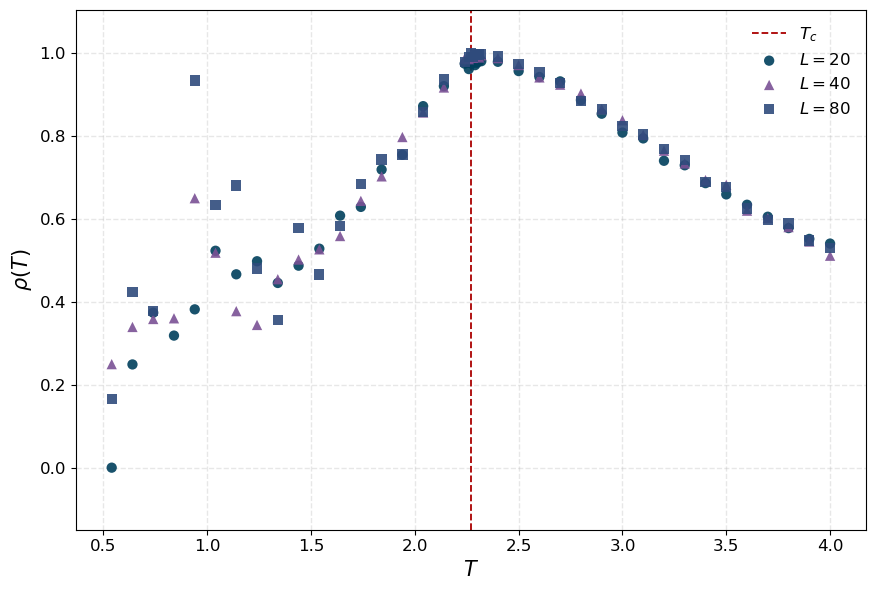

In [22]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 6))

# Paleta de colores sobrios y diferenciables
colors = ['#003f5c', '#7a5195', '#2f4b7c']  # Azul marino, burdeos, violeta grisáceo
markers = ['o', '^', 's']  # Círculo, triángulo, cuadrado

# Línea vertical para Tc
Tc = 2.269  # Temperatura crítica del modelo de Ising 2D
ax.axvline(Tc, linestyle='--', color='#aa0000', linewidth=1.3, label=r"$T_c$", zorder=2)

# Bucle sobre L = 20, 40, 80
for i, L in enumerate([20, 40, 80]):
    temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(f"Datos/L{L}/fort.66")
    magnetization_data = np.loadtxt(f"Datos/L{L}/fort.88")

    # Puntos
    mask = temperatura > 0  # Se me coló una temperatura negativa en los datos y no la quiero
    ax.scatter(temperatura[mask], correlacion[mask],
               color=colors[i], edgecolors='none', s=55, alpha=0.9,
               marker=markers[i], label=fr"$L = {L}$", zorder=4)

# Estética general
ax.set_xlabel(r"$T$", fontsize=15)
ax.set_ylabel(r"$\rho(T)$", fontsize=15)
ax.tick_params(labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.3)

# Leyenda sobria
ax.legend(fontsize=12, frameon=False)

# Ajustes finales
plt.tight_layout()
plt.ylim(bottom=-0.15)
plt.savefig('correlation_v1.png', dpi=300)
plt.show()


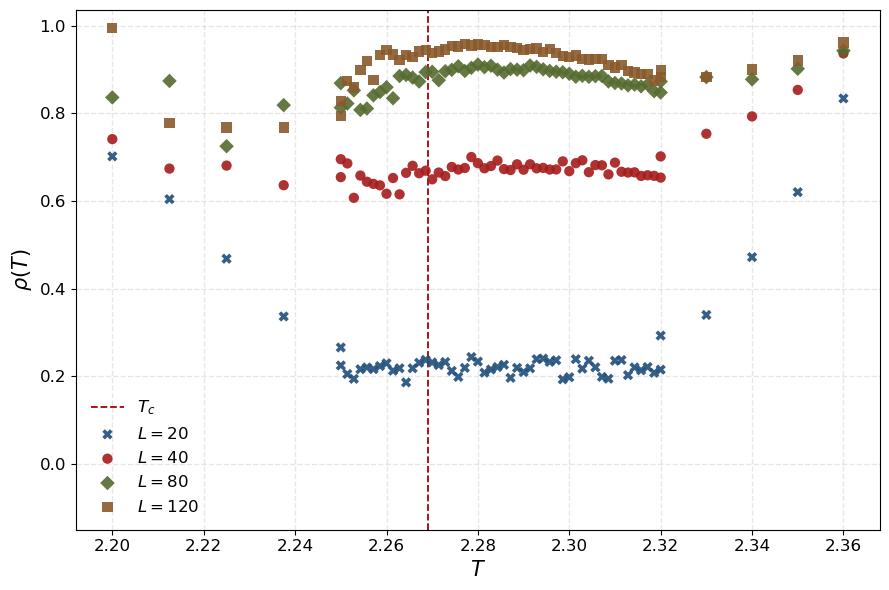

In [23]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 6))

# Paleta de colores sobrios y diferenciables
colors = ['#1f4e79', '#a61c1c', '#556b2f', '#8b5a2b', '#4b4b4b']
markers = ['X', 'o', 'D', 's']

# Línea vertical para Tc
Tc = 2.269  # Temperatura crítica del modelo de Ising 2D
ax.axvline(Tc, linestyle='--', color='#aa0000', linewidth=1.3, label=r"$T_c$", zorder=2)

# Bucle sobre L
for i, L in enumerate([20, 40, 80, 120]):
    temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(f"Datos/L{L}/fort.77")

    # Puntos
    mask = temperatura > 0  # Se me coló una temperatura negativa en los datos y no la quiero
    ax.scatter(temperatura[mask], correlacion[mask],
               color=colors[i], edgecolors='none', s=55, alpha=0.9,
               marker=markers[i], label=fr"$L = {L}$", zorder=4)

# Estética general
ax.set_xlabel(r"$T$", fontsize=15)
ax.set_ylabel(r"$\rho(T)$", fontsize=15)
ax.tick_params(labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.3)

# Leyenda sobria
ax.legend(fontsize=12, frameon=False)

# Ajustes finales
plt.tight_layout()
plt.ylim(bottom=-0.15)
plt.savefig('correlation_v2.png', dpi=300)
plt.show()
